# PatchMatch

**Imports**

In [21]:
import os
while os.path.split(os.getcwd())[1] != "patchmatch":
    os.chdir("..")
    if os.getcwd() == "/":
        raise ValueError()

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from time import time
from tqdm import tqdm

import patchmatch as pm

**Matplotlib display mode**

In [66]:
# Run this cell to display matplotlib plots in a separate window
%matplotlib qt

In [68]:
# Run this cell to display matplotlib plots inside the jupyter notebook
%matplotlib inline

In the following sections, we test the PatchMatch algorithm on 2 different images with copy-move forgery: one with a simple translation and one with a translation and a rotation.

## Image 1: Antibes

### Load image 

In [134]:
im = Image.open("data/TP_C02_007_copy.png")
im = np.array(im).astype("double")
gt = Image.open("data/TP_C02_007_gt.png")
gt = np.array(gt) > 0

### Initialize Patchmatch

Expected runtime with init_method=1 and zernike=True (p=10, max_zrd=6): 54s   
Expected runtime with init_method=2 and zernike=True (p=10, max_zrd=6): 55s   
Expected runtime with init_method=1 and zernike=False (p=10, max_zrd=6): 5s   
Expected runtime with init_method=2 and zernike=False (p=10, max_zrd=6): 5s   

In [135]:
t0 = time()
a = pm.PatchMatch(
    im,  # image
    p=10,  # patch half-size
    max_zrd=6,  # maximum Zernike degree
    min_dn=64,   # minimum displacement norm (previously T)
    n_rs_candidates=5,   # number of candidates in the random search phase (previously L)
    init_method=2,  # whether to use create_vect_field1 or create_vect_field2
    zernike=True  # whether to use Zernike moments
)
t1 = time()
print(t1 - t0)

152.83146929740906


### Run PatchMatch

Expected running time with zernike=True (max_zrd=6): <10s for each iteration (1 iteration = 2 scans)

In [136]:
t0 = time()
a.run(5)
t1 = time()
print(t1 - t0)

Scan
1926077
Scan
891712
Scan
743953
Scan
551463
Scan
464205
Scan
388973
Scan
316895
Scan
285057
Scan
240075
Scan
227332
79.58165264129639


In [137]:
a.get_min_displacement_norm()

64

### Plot results

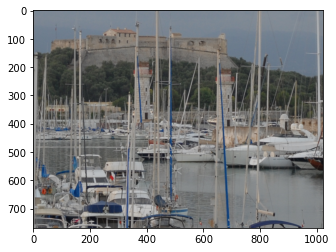

In [138]:
plt.imshow(im.astype("uint8"))

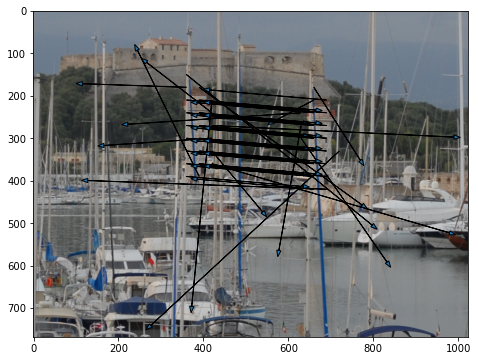

In [139]:
plt.figure(figsize=(16,6))
pm.plot_vect_field(a, gt, step=30, head_width=10)

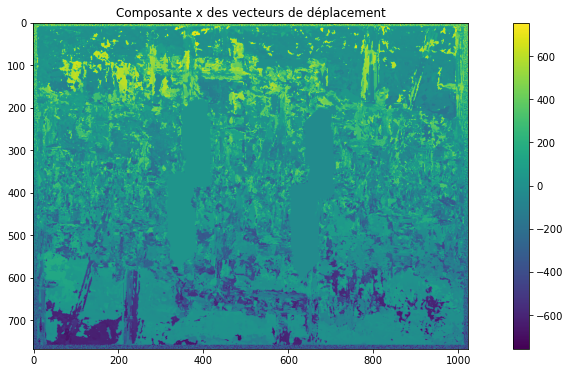

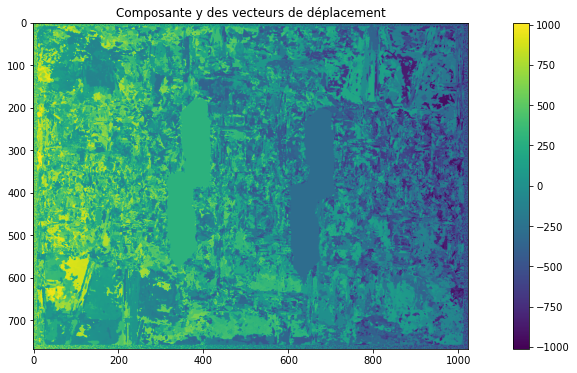

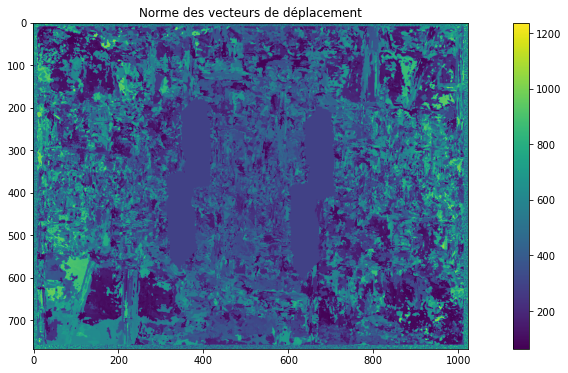

In [140]:
plt.figure(figsize=(16,6))
plt.title('Composante x des vecteurs de déplacement')
plt.imshow(a.vect_field[..., 0]) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()
plt.figure(figsize=(16,6))
plt.title('Composante y des vecteurs de déplacement')
plt.imshow(a.vect_field[..., 1]) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()
plt.figure(figsize=(16,6))
plt.title('Norme des vecteurs de déplacement')
plt.imshow(np.sqrt(a.vect_field[..., 0]**2 + a.vect_field[..., 1]**2)) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()

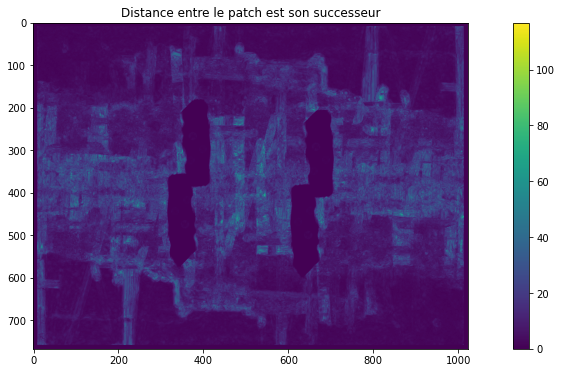

In [141]:
plt.figure(figsize=(16,6))
plt.title('Distance entre le patch est son successeur')
plt.imshow(a.dist_field)
plt.colorbar()
plt.show()

In [146]:
def gradn(u):
    v = np.sqrt( (np.diff(u,axis=0)[:,:-1])**2 + (np.diff(u,axis=1)[:-1,:])**2 )
    return v

vx = gradn(a.vect_field[..., 0])
vy = gradn(a.vect_field[..., 1])
n, m = a.n, a.m

mask_0 = np.zeros((m,n))
mask_0[:-1,:-1] = 1*(vy<0.1)*(vx<0.1)

#Mean to eliminate noise
mask_1 = np.zeros((m,n))
r = 3
for i in tqdm(range(r, m - r)):
    for j in range(r, n - r):
        mask_1[i,j] = np.mean(mask_0[i-r+1:i+r,j-r+1:j+r])

#good threshold to keep just the mask
th = 0.5
mask_2 = 1*(mask_1>th)

#dilatation
mask = np.zeros((m,n))
for i in tqdm(range(m)):
    for j in range(n):
        mask[i,j] = np.max(mask_2[max(i-p+1,0):min(i+p,m-1),max(j-p+1,0):min(j+p,n-1)])

100%|████████████████████████████████████████████████████████████████████████████████| 768/768 [00:12<00:00, 59.32it/s]


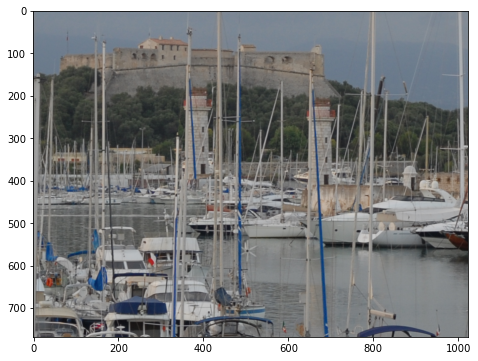

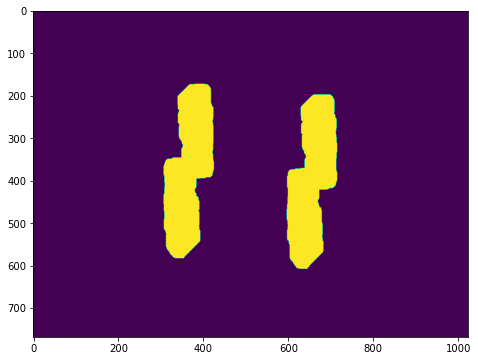

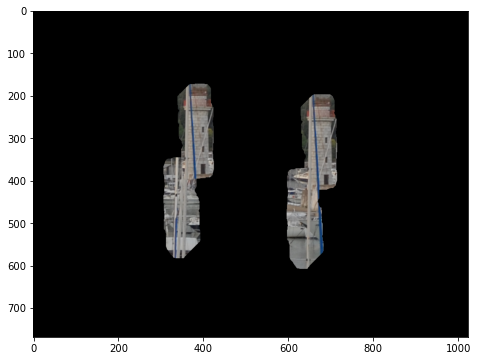

In [147]:
plt.figure(figsize=(16,6))
plt.imshow(im.astype("uint8"))
plt.show()

plt.figure(figsize=(16,6))
plt.imshow(mask)
plt.show()

plt.figure(figsize=(16,6))
plt.imshow((mask[:,:,None]*im).astype("uint8"))
plt.show()

# Image 2 : Leaf

In [92]:
im = Image.open("data/feuille_copy_move.png")
im = np.array(im).astype("double")

In [93]:
t0 = time()
a = pm.PatchMatch(
    im,  # image
    p=10,  # patch half-size
    max_zrd=6,  # maximum Zernike degree
    min_dn=64,   # minimum displacement norm (previously T)
    n_rs_candidates=5,   # number of candidates in the random search phase (previously L)
    init_method=2,  # whether to use create_vect_field1 or create_vect_field2
    zernike=True  # whether to use Zernike moments
)
t1 = time()
print(t1 - t0)

3.982489585876465


In [94]:
t0 = time()
a.run(5)
t1 = time()
print(t1 - t0)

Scan
92722
Scan
40337
Scan
24229
Scan
14904
Scan
14248
Scan
10409
Scan
9961
Scan
7437
Scan
7529
Scan
6041
2.450417995452881


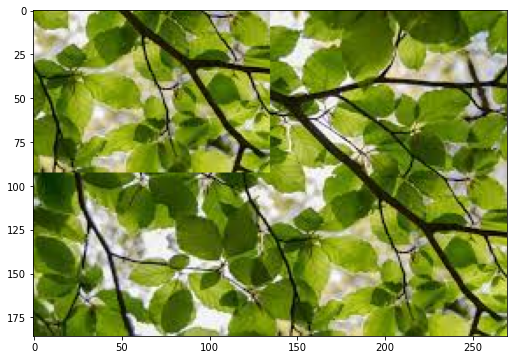

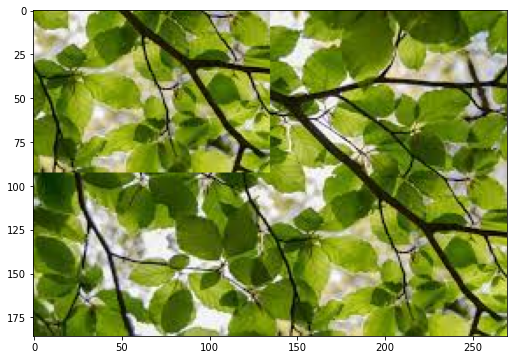

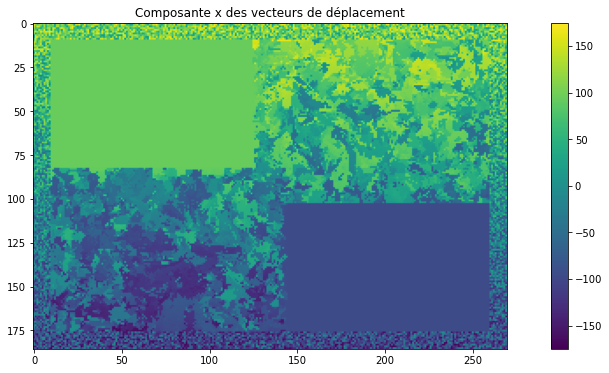

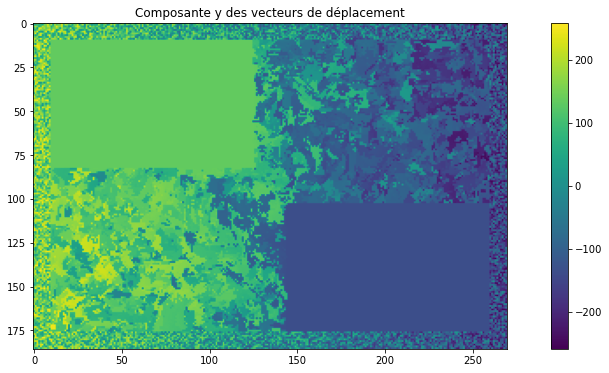

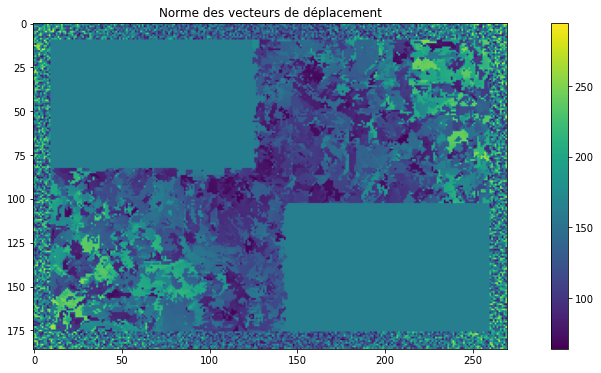

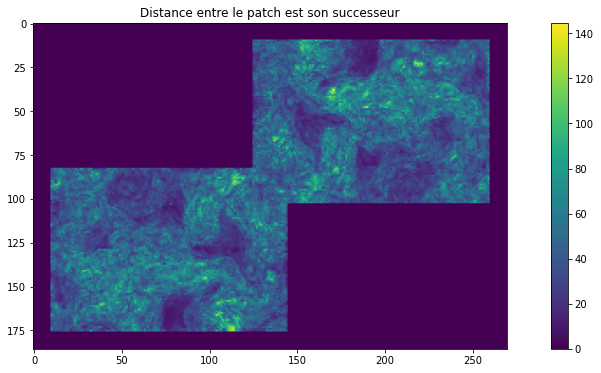

In [96]:
plt.figure(figsize=(16,6))
plt.imshow(im.astype("uint8"))
plt.show()

plt.figure(figsize=(16,6))
pm.plot_vect_field(a, gt, step=30, head_width=10)
plt.show()

plt.figure(figsize=(16,6))
plt.title('Composante x des vecteurs de déplacement')
plt.imshow(a.vect_field[..., 0]) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()
plt.figure(figsize=(16,6))
plt.title('Composante y des vecteurs de déplacement')
plt.imshow(a.vect_field[..., 1]) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()
plt.figure(figsize=(16,6))
plt.title('Norme des vecteurs de déplacement')
plt.imshow(np.sqrt(a.vect_field[..., 0]**2 + a.vect_field[..., 1]**2)) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()

plt.figure(figsize=(16,6))
plt.title('Distance entre le patch est son successeur')
plt.imshow(a.dist_field)
plt.colorbar()
plt.show()

In [117]:
vx = gradn(a.vect_field[..., 0])
vy = gradn(a.vect_field[..., 1])
n, m = a.n, a.m

mask_0 = np.zeros((m,n))
mask_0[:-1,:-1] = 1*(vy<0.1)*(vx<0.1)

#Mean to eliminate noise
mask_1 = np.zeros((m,n))
r = 3
for i in tqdm(range(r, m - r)):
    for j in range(r, n - r):
        mask_1[i,j] = np.mean(mask_0[i-r+1:i+r,j-r+1:j+r])

#good threshold to keep just the mask
th = 0.2
mask_2 = 1*(mask_1>th)

#dilatation
mask = np.zeros((m,n))
for i in tqdm(range(m)):
    for j in range(n):
        mask[i,j] = np.max(mask_2[max(i-p+1,0):min(i+p,m-1),max(j-p+1,0):min(j+p,n-1)])

100%|███████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 570.23it/s]


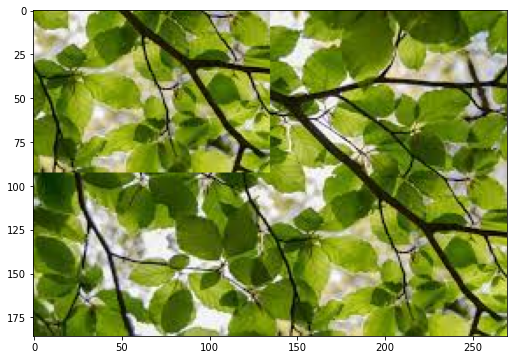

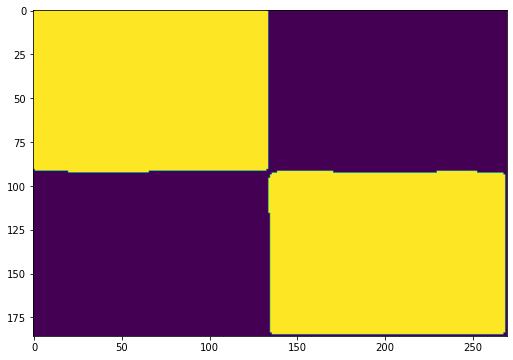

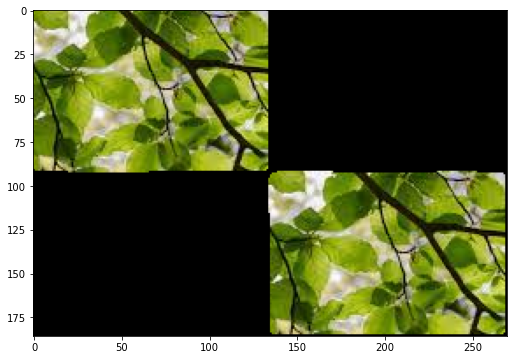

In [119]:
plt.figure(figsize=(16,6))
plt.imshow(im.astype("uint8"))
plt.show()

plt.figure(figsize=(16,6))
plt.imshow(mask)
plt.show()

plt.figure(figsize=(16,6))
plt.imshow((mask[:,:,None]*im).astype("uint8"))
plt.show()

## Image 2: Flowers

### Load image 

In [25]:
im2 = Image.open("data/TP_C01_039_copy_r45.png")
im2 = np.array(im2).astype("double")
gt2 = Image.open("data/TP_C01_039_gt_r45.png")
gt2 = np.array(gt2) > 0

### Initialize Patchmatch

In [26]:
t0 = time()
a2 = pm.PatchMatch(
    im2,  # image
    p=10,  # patch half-size
    max_zrd=6,  # maximum Zernike degree
    min_dn=64,   # minimum displacement norm (previously T)
    n_rs_candidates=5,   # number of candidates in the random search phase (previously L)
    init_method=2,  # whether to use create_vect_field1 or create_vect_field2
    zernike=True  # whether to use Zernike moments
)
t1 = time()
print(t1 - t0)

54.986863136291504


### Run PatchMatch

In [27]:
t0 = time()
a2.run(5)
t1 = time()
print(t1 - t0)

Scan
1989058
Scan
925714
Scan
724085
Scan
587893
Scan
464849
Scan
410869
Scan
330087
Scan
300972
Scan
250155
Scan
232905
35.16111779212952


### Plot results

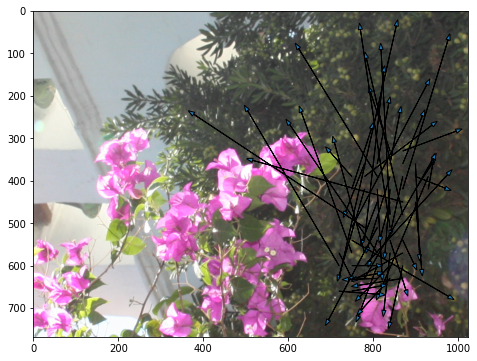

In [28]:
plt.figure(figsize=(16,6))
pm.plot_vect_field(a2, gt2, step=30, head_width=10)

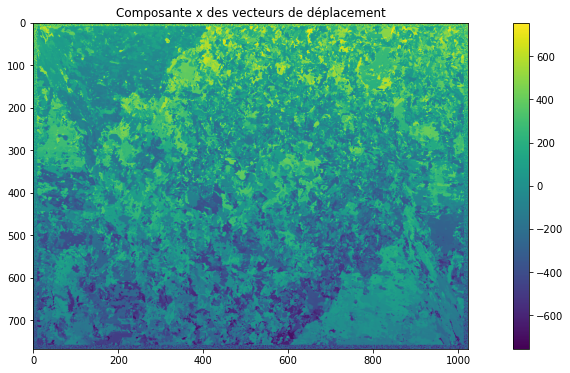

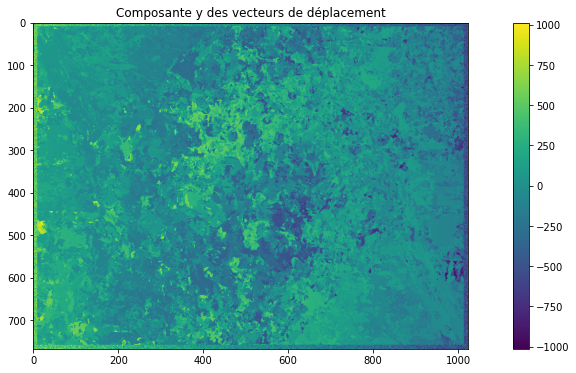

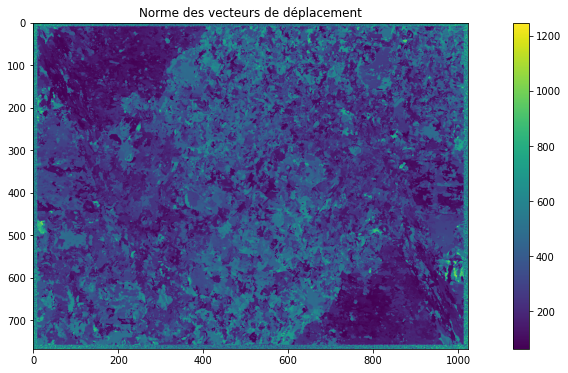

In [29]:
plt.figure(figsize=(16,6))
plt.title('Composante x des vecteurs de déplacement')
plt.imshow(a2.vect_field[..., 0]) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()
plt.figure(figsize=(16,6))
plt.title('Composante y des vecteurs de déplacement')
plt.imshow(a2.vect_field[..., 1]) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()
plt.figure(figsize=(16,6))
plt.title('Norme des vecteurs de déplacement')
plt.imshow(np.sqrt(a2.vect_field[..., 0]**2 + a2.vect_field[..., 1]**2)) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()

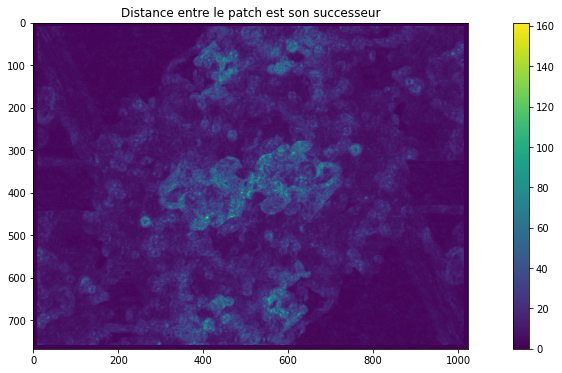

In [30]:
plt.figure(figsize=(16,6))
plt.title('Distance entre le patch est son successeur')
plt.imshow(a2.dist_field)
plt.colorbar()
plt.show()